In [1]:

import pandas as pd
import re #regex library to format fast to read into pd 
import os

import matplotlib.pyplot as plt
import feather

import numpy as np
import platform
import mne


from mne.channels import find_ch_adjacency, make_1020_channel_selections
from mne.stats import spatio_temporal_cluster_test
from mne.stats import (ttest_1samp_no_p, bonferroni_correction, fdr_correction,


                       permutation_t_test, permutation_cluster_1samp_test,spatio_temporal_cluster_1samp_test)
import sys
if platform.system()=='Darwin':
    os.chdir('/Volumes/BBC/BBC/WP1/data/EEG/tsk/')
    #sys.path.append('/Users/leupinv/BBC/WP1/data/Code/python/BBC')
    #if this doesn't work pound line right above this, restart the kernel, rerun the cell. 
    #Then uncomment the same line and rerun

else:
    #os.chdir('Z:/BBC/WP1/data/EEG/tsk')
    #sys.path.append('C:/Users/Vivi/switchdrive/BBC/WP1/data/Code/python/BBC')
    os.chdir('Z:/BBC/WP1/data/EEG/tsk')

from base.files_in_out import getListOfFiles,GetFiles
from stats.stats_helper import filter_list, tTest_ana
import stats.t_tests_cluster as clus
import stats.stats_helper as s_hp
import base.base_constants as cs

# load BF txt and plot it

In [2]:
from  stats.t_tests_cluster import plot_from_BF


In [3]:
%load_ext autoreload
%autoreload 2
import matplotlib as mpl
mpl.rcParams['svg.fonttype']='none'
mpl.rcParams['text.usetex']=False
plt.style.use('default')

mpl.rcParams['svg.fonttype']='none'
mpl.rcParams['text.usetex']=False

In [91]:
idx=3
modlist=['modfit','awafit','rawerps','modfit_card']
cond_list=["awareness_unaware","awareness","awareness","card_phase_sys"]
#define variables
modtype=modlist[idx]
erp_type="hep"
cond=cond_list[idx]
dc_type="dc"

#load corresponding file 


file_dir=f'ana/deconvolution/stats/BF_matrix_{modtype}_{erp_type}_{cond}_{dc_type}.ep'
f = open(file_dir)

In [92]:
data=np.loadtxt(file_dir)
data.shape

(128, 282)

In [93]:
data=data[:,25:] # remove first 100 ms (to have shape -200, 800)
data.shape

(128, 257)

In [94]:
%matplotlib qt
time_points=[0.505]
time_points_s=[round(x*1000) for x in time_points]
fig_evo,fig_topo=clus.plot_from_BF(data,log_trans=True,averages=0.015,start=-0.2,plot_times=time_points)

number of time pointst: 8
length of minimum time points to be significant: 1
at the moment if only one TF is significant the electrode will be displayed as sig


In [95]:
file_evo_dir=f'ana/deconvolution/figures/mass_evo_{modtype}_{erp_type}_{cond}_{dc_type}.svg'
fig_evo.savefig(file_evo_dir,format='svg')

In [96]:
file_topo_dir=f'ana/deconvolution/figures/topo_evo_{time_points_s}_{modtype}_{erp_type}_{cond}_{dc_type}.svg'
fig_topo.savefig(file_topo_dir,format='svg')

# Plot tvalues and use BF as mask

## aware vs unaware in aware fit

In [101]:
g_num='g01'
file_dir=f'ana/deconvolution/ep_betas/modfit/dc/{g_num}_modfit_hep_awareness_unaware_dc.ep'
f = open(file_dir)


In [106]:
data=np.loadtxt(file_dir)
data=data[25:,:]
data.shape

(257, 128)

In [116]:
erp_type='hep'
modtype='awafit'
subject_list=cs.G_N
X_awa=np.empty((len(subject_list),data.shape[1],data.shape[0]))
dc='dc'
for idx,g_num in enumerate(subject_list):
    file_dir=f'ana/deconvolution/ep_betas/awafit/{dc}/{g_num}_aware_hep__Intercept__{dc}.ep'
    data=np.loadtxt(file_dir)
    data=data[25:,:]


    X_awa[idx,:,:]=data.T




In [117]:
subject_list=cs.G_N
X_unawa=np.empty((len(subject_list),data.shape[1],data.shape[0]))
for idx,g_num in enumerate(subject_list):
    file_dir=f'ana/deconvolution/ep_betas/awafit/{dc}/{g_num}_unaware_hep__Intercept__{dc}.ep'
    data=np.loadtxt(file_dir)
    data=data[25:,:]

    X_unawa[idx,:,:]=data.T




### load bf

In [118]:
cond="awareness"
dc_type=dc

#load corresponding file



file_dir=f'ana/deconvolution/stats/BF_matrix_{modtype}_{erp_type}_{cond}_{dc_type}.ep'
f = open(file_dir)

In [119]:
data_BF=np.loadtxt(file_dir)
data_BF=data_BF[:,25:]

In [120]:
X=X_awa-X_unawa

In [121]:
%matplotlib qt
filepath=f'{modtype}_{erp_type}_{cond}_{dc_type}'
s_hp.get_tTest(X,crop_value=[-0.2,0.8],FDR=False,mask_BF=data_BF,BF=True, plot_times=[0.505],averages=0.015,png=filepath)

-0.2
number of time pointst: 8
length of minimum time points to be significant: 1
at the moment if only one TF is significant the electrode will be displayed as sig
(128, 257)


(array([[ 0.74790463,  0.7844591 ,  0.58104353, ..., -0.63610203,
         -0.53686782, -0.54305421],
        [ 0.48352394,  0.69386511,  0.77381092, ..., -1.17054434,
         -1.07392697, -1.09336066],
        [-0.1985701 , -0.0427281 ,  0.07988185, ..., -1.00522709,
         -0.9628418 , -0.94376942],
        ...,
        [-1.26057206, -1.20676912, -1.05436814, ...,  0.59959113,
          0.64410367,  0.53919931],
        [-0.4429272 , -0.47633934, -0.39004027, ...,  0.3720565 ,
          0.47933657,  0.54765813],
        [-0.51672195, -0.61373331, -0.67336713, ...,  0.27265864,
          0.54750225,  0.64640104]]),
 array([[0.46054008, 0.43913205, 0.56569999, ..., 0.52969865, 0.59545423,
         0.59124244],
        [0.63235472, 0.49328781, 0.4453053 , ..., 0.25131142, 0.29171037,
         0.2832348 ],
        [0.84398459, 0.96621112, 0.93687993, ..., 0.32310187, 0.34358736,
         0.35308441],
        ...,
        [0.21751155, 0.23727309, 0.30042007, ..., 0.55343499, 0.52457029

# Card fit

In [85]:
erp_type='hep'
modtype='cardfit'
subject_list=cs.G_N
X_sys=np.empty((len(subject_list),data.shape[1],data.shape[0]))
dc='dc'
for idx,g_num in enumerate(subject_list):
    file_dir=f'ana/deconvolution/ep_betas/cardfit/{dc}/{g_num}_sys_hep__Intercept__{dc}.ep'
    data=np.loadtxt(file_dir)
    data=data[25:,:]


    X_sys[idx,:,:]=data.T




In [86]:
subject_list=cs.G_N
X_dia=np.empty((len(subject_list),data.shape[1],data.shape[0]))
for idx,g_num in enumerate(subject_list):
    file_dir=f'ana/deconvolution/ep_betas/cardfit/{dc}/{g_num}_dia_hep__Intercept__{dc}.ep'
    data=np.loadtxt(file_dir)
    data=data[25:,:]

    X_dia[idx,:,:]=data.T




### load bf

In [87]:
cond="sys"
dc_type=dc

#load corresponding file



file_dir=f'ana/deconvolution/stats/BF_matrix_{modtype}_{erp_type}_{cond}_{dc_type}.ep'
f = open(file_dir)

In [88]:
data_BF=np.loadtxt(file_dir)
data_BF=data_BF[:,25:]

In [90]:
X=X_sys-X_dia

In [92]:
%matplotlib qt
filepath=f'{modtype}_{erp_type}_{cond}_{dc_type}'
s_hp.get_tTest(X,crop_value=[-0.2,0.8],FDR=False,mask_BF=data_BF,BF=True, plot_times='peaks',png=filepath)

-0.2


(array([[ 1.68899167,  1.72267661,  1.63827675, ..., -1.91057944,
         -1.96644964, -2.08986542],
        [ 0.97120231,  1.03735157,  0.92078675, ..., -0.82349609,
         -0.77802048, -0.81242395],
        [ 0.66796763,  0.73232331,  0.6284483 , ..., -0.36238624,
         -0.30429486, -0.25229611],
        ...,
        [-1.09139599, -1.16378129, -1.27847786, ...,  0.69508912,
          0.71808681,  0.83439434],
        [-0.67509407, -0.57814444, -0.54982469, ...,  1.50973338,
          1.45274367,  1.49389153],
        [-0.71467536, -0.66943043, -0.65736063, ...,  1.41097345,
          1.36044767,  1.41844679]]),
 array([[0.10194676, 0.0955969 , 0.11217024, ..., 0.06599102, 0.05888287,
         0.04551018],
        [0.33947888, 0.30814473, 0.36475856, ..., 0.41694703, 0.44285862,
         0.42316776],
        [0.50943589, 0.46984899, 0.53462903, ..., 0.71969107, 0.76307616,
         0.80259181],
        ...,
        [0.28408359, 0.2539986 , 0.2112186 , ..., 0.4925318 , 0.47844935

## card phase (or single modfit)

In [229]:
g_num='g01'
file_dir=f'ana/deconvolution/ep_betas/modfit/dc/{g_num}_modfit_hep_awareness_unaware_dc.ep'
f = open(file_dir)


In [230]:
data=np.loadtxt(file_dir)
data=data[25:,:]
data.shape

(257, 128)

In [246]:
erp_type='hep'
modtype='modfit_card'
cond='card_phase_sys'
subject_list=cs.G_N
X=np.empty((len(subject_list),data.shape[1],data.shape[0]))
dc='dc'
for idx,g_num in enumerate(subject_list):
    file_dir=f'ana/deconvolution/ep_betas/{modtype}/{dc}/{g_num}_{modtype}_hep_{cond}_{dc}.ep'
    data=np.loadtxt(file_dir)
    data=data[25:,:]


    X[idx,:,:]=data.T




### load bf

In [247]:

dc_type=dc

#load corresponding file



file_dir=f'ana/deconvolution/stats/BF_matrix_{modtype}_{erp_type}_{cond}_{dc_type}.ep'
f = open(file_dir)

In [248]:
data_BF=np.loadtxt(file_dir)
data_BF=data_BF[:,25:]

In [249]:
%matplotlib qt
filepath=f'{modtype}_{erp_type}_{cond}_{dc_type}'
s_hp.get_tTest(X,crop_value=[-0.2,0.8],FDR=False,mask_BF=data_BF,BF=True, plot_times='peaks',averages=0.015,png=filepath)

-0.2


(array([[ 0.99184955,  0.84812358,  0.61618383, ..., -0.22337197,
         -0.35807637, -0.52630541],
        [ 0.09535323,  0.02403264, -0.1446225 , ...,  1.77087273,
          1.67327192,  1.44587967],
        [-0.60339448, -0.63291674, -0.71469875, ...,  2.94849893,
          2.64741625,  2.35987675],
        ...,
        [-1.63267168, -1.72197644, -1.73967095, ..., -0.27732763,
          0.18181054,  0.88182908],
        [-0.89781767, -0.88924712, -0.88549101, ..., -0.78823588,
         -0.58946855, -0.14168686],
        [-0.93207099, -0.90897315, -0.86020326, ..., -1.01675305,
         -0.66722363, -0.28126391]]),
 array([[0.32947509, 0.40331535, 0.54258007, ..., 0.82481205, 0.72287949,
         0.60267839],
        [0.92469012, 0.98099118, 0.88600935, ..., 0.08709354, 0.10502886,
         0.1589325 ],
        [0.55093697, 0.53174759, 0.48050935, ..., 0.00625065, 0.01297707,
         0.02522429],
        ...,
        [0.11335068, 0.09572542, 0.09252186, ..., 0.78349593, 0.85699629

## same for erp

In [122]:

#define variables
modtype='rawerps'
erp_type="hep"

dc_type="nodc"


filepath='ana/MNE/evo_list/maskOFF/correct/cfa/hep/norm/'
filename=f"maskOFF_correct_cfa_hep_norm_RRCA_list-ave.fif"
fp=filepath+filename
evo_awa=mne.read_evokeds(fp)

filepath='ana/MNE/evo_list/maskOFF/correct/cfa/hep/norm/'
filename=f"maskOFF_correct_cfa_hep_norm_RRCU_list-ave.fif"
fp=filepath+filename
evo_unawa=mne.read_evokeds(fp)


Reading ana/MNE/evo_list/maskOFF/correct/cfa/hep/norm/maskOFF_correct_cfa_hep_norm_RRCA_list-ave.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.13 × hep/normal/correct/aware/R/exh/RRCA + 0.08 × hep/normal/correct/aware/R/inh/RRCA + 0.47 × hep/normal/correct/aware/R2/exh/RRCA + 0.32 × hep/normal/correct/aware/R2/inh/RRCA
 G_n= g01)
        0 CTF compensation matrices available
        nave = 345 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.18 × hep/normal/correct/aware/R/exh/RRCA + 0.15 × hep/normal/correct/aware/R/inh/RRCA + 0.42 × hep/normal/correct/aware/R2/exh/RRCA + 0.25 × hep/normal/correct/aware/R2/inh/RRCA
 G_n= g03)
    

### load bf

In [123]:
cond="awareness"

#load corresponding file


file_dir=f'ana/deconvolution/stats/BF_matrix_{modtype}_{erp_type}_{cond}_{dc_type}.ep'
f = open(file_dir)

In [124]:
data_BF=np.loadtxt(file_dir)


In [125]:
filepath=f'{modtype}_{erp_type}_{cond}_{dc_type}'
s_hp.tTest_ana([evo_awa,evo_unawa],crop_value=[-0.2,0.8],BF=True,mask_BF=data_BF,plot_times=[0.505],averages=0.015,png=filepath)

C:\Users\Vivi\Documents\GitHub\unfold_proj\stats\stats_helper.py:134: RuntimeWarning: tmin is not in Evoked time interval. tmin is set to evoked.tmin (-0.199219 sec)
  data_crop = evoked[0].copy().crop(crop_value[0], crop_value[1])
C:\Users\Vivi\Documents\GitHub\unfold_proj\stats\stats_helper.py:151: RuntimeWarning: tmin is not in Evoked time interval. tmin is set to evoked.tmin (-0.199219 sec)
  X[idx, :, :] = ev.copy().crop(crop_value[0], crop_value[1]).data
C:\Users\Vivi\Documents\GitHub\unfold_proj\stats\stats_helper.py:151: RuntimeWarning: tmin is not in Evoked time interval. tmin is set to evoked.tmin (-0.199219 sec)
  X[idx, :, :] = ev.copy().crop(crop_value[0], crop_value[1]).data
C:\Users\Vivi\Documents\GitHub\unfold_proj\stats\stats_helper.py:151: RuntimeWarning: tmin is not in Evoked time interval. tmin is set to evoked.tmin (-0.199219 sec)
  X[idx, :, :] = ev.copy().crop(crop_value[0], crop_value[1]).data
C:\Users\Vivi\Documents\GitHub\unfold_proj\stats\stats_helper.py:151:

(30, 128, 257)
(30, 128, 257)
-0.2
number of time pointst: 8
length of minimum time points to be significant: 1
at the moment if only one TF is significant the electrode will be displayed as sig
(128, 257)


(array([[ 0.56960689,  0.31289115, -0.10535808, ..., -0.05973568,
         -0.15459526, -0.32966896],
        [ 0.5701434 ,  0.6087237 ,  0.44771883, ...,  0.44242365,
          0.39711389,  0.25578614],
        [-0.37076401, -0.25545664, -0.18141073, ...,  1.66066648,
          1.74075741,  1.67582398],
        ...,
        [-1.73357277, -1.63178237, -1.57241907, ...,  2.14695445,
          2.20221874,  2.02230741],
        [-0.11372384, -0.11839444, -0.07197061, ...,  0.89945887,
          1.15874544,  1.00441462],
        [-0.28990799, -0.49637181, -0.65370136, ...,  0.30356174,
          0.4791892 ,  0.3059059 ]]),
 array([[0.57333063, 0.7566025 , 0.91681705, ..., 0.95277591, 0.87821133,
         0.74401958],
        [0.57297152, 0.54744663, 0.65768285, ..., 0.66146494, 0.69419114,
         0.79992161],
        [0.71350795, 0.80017361, 0.85730721, ..., 0.10755624, 0.09232815,
         0.10452326],
        ...,
        [0.09361555, 0.11353892, 0.12670143, ..., 0.04029078, 0.03575383

# Compute gavgs

In [95]:
g_num='g01'
file_dir=f'ana/deconvolution/ep_betas/modfit/dc/{g_num}_modfit_hep_awareness_unaware_dc.ep'
f = open(file_dir)


In [96]:
data=np.loadtxt(file_dir)
data.shape

(282, 128)

In [130]:
subject_list=cs.G_N
X=np.empty((len(subject_list),data.shape[1],data.shape[0]))
cond_list=["awareness_unaware","awareness","awareness","card_phase_sys","_Intercept_","awareness_unaware_card_phase_sys"]
fit='base'
dc='nodc'
beta_type=cond_list[4]

for idx,g_num in enumerate(subject_list):
    file_dir=f'ana/deconvolution/ep_betas/{fit}/{dc}/{g_num}_{fit}_hep_{beta_type}_{dc}.ep'
    data=np.loadtxt(file_dir)

    X[idx,:,:]=data.T




In [131]:
gavg=np.mean(X,0).T
filename=f'ana/deconvolution/ep_betas/{fit}/{dc}/gavg_{fit}_hep_{beta_type}_{dc}.ep'

np.savetxt(filename,gavg)

# For cardfit

In [117]:
subject_list=cs.G_N
X=np.empty((len(subject_list),data.shape[1],data.shape[0]))
sys_cond='dia'
fit='cardfit'
dc='nodc'
beta_type="_Intercept_"

for idx,g_num in enumerate(subject_list):
    file_dir=f'ana/deconvolution/ep_betas/{fit}/{dc}/{g_num}_{sys_cond}_hep_{beta_type}_{dc}.ep'
    data=np.loadtxt(file_dir)

    X[idx,:,:]=data.T




In [118]:
gavg=np.mean(X,0).T
filename=f'ana/deconvolution/ep_betas/{fit}/{dc}/gavg_{fit}_hep_{sys_cond}_{dc}.ep'

np.savetxt(filename,gavg)

# Plot waveforms gavgs
## plot erps

In [212]:

#define variables
modtype='rawerp'
erp_type="hep"
cond='unaware'
dc_type="dc"


filepath='ana/MNE/evo_list/maskOFF/correct/cfa/hep/norm/'
filename=f"maskOFF_correct_cfa_hep_norm_RRCA_list-ave.fif"
fp=filepath+filename
evo_awa=mne.read_evokeds(fp)

filepath='ana/MNE/evo_list/maskOFF/correct/cfa/hep/norm/'
filename=f"maskOFF_correct_cfa_hep_norm_RRCU_list-ave.fif"
fp=filepath+filename
evo_unawa=mne.read_evokeds(fp)


Reading ana/MNE/evo_list/maskOFF/correct/cfa/hep/norm/maskOFF_correct_cfa_hep_norm_RRCA_list-ave.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.13 × hep/normal/correct/aware/R/exh/RRCA + 0.08 × hep/normal/correct/aware/R/inh/RRCA + 0.47 × hep/normal/correct/aware/R2/exh/RRCA + 0.32 × hep/normal/correct/aware/R2/inh/RRCA
 G_n= g01)
        0 CTF compensation matrices available
        nave = 345 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.18 × hep/normal/correct/aware/R/exh/RRCA + 0.15 × hep/normal/correct/aware/R/inh/RRCA + 0.42 × hep/normal/correct/aware/R2/exh/RRCA + 0.25 × hep/normal/correct/aware/R2/inh/RRCA
 G_n= g03)
    

In [111]:
evo_awa=[ev.crop(None,0.8) for ev in evo_awa]
evo_unawa=[ev.crop(None,0.8) for ev in evo_unawa]

In [112]:
regions=dict(dc_post=['A5','A14','A16','A18','A23'],dc_front=['C32','D4'],nodc=['B12','B14','B23','B24'] )

if phy_sig=='rsp_phase':
    colors=[['olivedrab','darkgreen'],['tab:pink','purple']]
elif phy_sig=='cardiac_phase':
    colors=[['c','b'],['tab:orange','r']]
else:
    colors=['k','grey']

In [113]:


evokeds=dict(aware=evo_awa,unaware=evo_unawa)

fig,axs=plt.subplots(1,3,figsize=(10,5))
n=0
for regio, picked in regions.items():
    print(picked)

    fig_fin=mne.viz.plot_compare_evokeds(evokeds,ci=False, picks=picked,show_sensors=True,legend='upper right',truncate_yaxis=False,axes=axs[n],combine='mean',vlines=[0,0.49,0.52],ylim=dict(eeg=[-1.5,1.5]))
    n+=1


['A5', 'A14', 'A16', 'A18', 'A23']
combining channels using "mean"
combining channels using "mean"
['C32', 'D4']
combining channels using "mean"
combining channels using "mean"
['B12', 'B14', 'B23', 'B24']
combining channels using "mean"
combining channels using "mean"


In [114]:
file_dir=f'ana/deconvolution/figures/waveforms_gavg_{modtype}_{erp_type}_{cond}_{dc_type}.svg'
fig.savefig(file_dir,format='svg')

## plot awafit awa vs unawa

In [124]:

#define variables
modtype='awafit'
erp_type="hep"
cond='aware'
dc_type="nodc"

#load corresponding file


file_dir=f'ana/deconvolution/ep_betas/{modtype}/{dc_type}/gavg_{modtype}_{erp_type}_{cond}_{dc_type}.ep'
f = open(file_dir)

In [125]:
data_aware=np.loadtxt(file_dir)
data.shape

(282, 128)

In [126]:

#define variables
modtype='awafit'

cond='unaware'


#load corresponding file


file_dir=f'ana/deconvolution/ep_betas/{modtype}/{dc_type}/gavg_{modtype}_{erp_type}_{cond}_{dc_type}.ep'
f = open(file_dir)

In [127]:
data_unaware=np.loadtxt(file_dir)


In [128]:
def get_evo(data,tmin=-0.3):
    biosemi_montage = mne.channels.make_standard_montage('biosemi128')

    info = mne.create_info(ch_names=biosemi_montage.ch_names, sfreq=256.,
                           ch_types='eeg')
    evok=mne.EvokedArray(data,info,tmin=tmin)
    evok.set_montage(biosemi_montage)
    return evok

In [129]:
evo_awa=get_evo(data_aware.T).crop(-0.2,None)
evo_unawa=get_evo(data_unaware.T).crop(-0.2,None)

In [66]:
regions=dict(dc_post=['A5','A14','A16','A18','A23'],dc_front=['C32','D4'],nodc=['B12','B14','B23','B24'] )

regions=dict(nodc_post=['A13','A14','A16','A15','A23'],dc_front=['C32','D4'],nodc=['B12','B14','B23','B24'] )

if phy_sig=='rsp_phase':
    colors=[['olivedrab','darkgreen'],['tab:pink','purple']]
elif phy_sig=='cardiac_phase':
    colors=[['c','b'],['tab:orange','r']]
else:
    colors=['k','grey']

In [131]:


evokeds=dict(aware=evo_awa,unaware=evo_unawa)

fig,axs=plt.subplots(1,3,figsize=(10,5))
n=0
for regio, picked in regions.items():
    print(picked)

    fig_fin=mne.viz.plot_compare_evokeds(evokeds,ci=False, picks=picked,show_sensors=True,legend='upper right',truncate_yaxis=False,axes=axs[n],combine='mean',vlines=[0,0.49,0.52],ylim=dict(eeg=[-1.5*1e6,1.5*1e6]))
    n+=1


['A5', 'A14', 'A16', 'A18', 'A23']
combining channels using "mean"
combining channels using "mean"
['C32', 'D4']
combining channels using "mean"
combining channels using "mean"
['B12', 'B14', 'B23', 'B24']
combining channels using "mean"
combining channels using "mean"


In [132]:
file_dir=f'ana/deconvolution/figures/waveforms_gavg_{modtype}_{erp_type}_{cond}_{dc_type}.svg'
fig.savefig(file_dir,format='svg')

## plot cardfit sys vs dia

In [140]:

#define variables
modtype='cardfit'
erp_type="hep"
cond_1='sys'
dc_type_1="nodc"

k_1=f'{cond_1}_{dc_type_1}'
#load corresponding file


file_dir=f'ana/deconvolution/ep_betas/{modtype}/{dc_type_1}/gavg_{modtype}_{erp_type}_{cond_1}_{dc_type_1}.ep'
f = open(file_dir)

In [141]:
data_1=np.loadtxt(file_dir)
data.shape

(282, 128)

In [142]:

#define variables

dc_type_2="dc"
cond_2='sys'
k_2=f'{cond_2}_{dc_type_2}'

#load corresponding file


file_dir=f'ana/deconvolution/ep_betas/{modtype}/{dc_type_2}/gavg_{modtype}_{erp_type}_{cond_2}_{dc_type_2}.ep'
f = open(file_dir)

In [143]:
data_2=np.loadtxt(file_dir)


In [144]:
def get_evo(data,tmin=-0.3):
    biosemi_montage = mne.channels.make_standard_montage('biosemi128')

    info = mne.create_info(ch_names=biosemi_montage.ch_names, sfreq=256.,
                           ch_types='eeg')
    evok=mne.EvokedArray(data,info,tmin=tmin)
    evok.set_montage(biosemi_montage)
    return evok

In [145]:
evo_1=get_evo(data_1.T).crop(-0.2,None)
evo_2=get_evo(data_2.T).crop(-0.2,None)

In [146]:
evokeds={k_1:evo_1,k_2:evo_2}
fig_fin=mne.viz.plot_compare_evokeds(evokeds,ci=False, picks=['A23'],show_sensors=True,legend='upper right',truncate_yaxis=False,combine='mean')


combining channels using "mean"
combining channels using "mean"


C:\Users\Vivi\AppData\Local\Temp\ipykernel_25996\4240962033.py:2: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  fig_fin=mne.viz.plot_compare_evokeds(evokeds,ci=False, picks=['A23'],show_sensors=True,legend='upper right',truncate_yaxis=False,combine='mean')


In [147]:
%matplotlib qt

fig,axs=plt.subplots(1,3,figsize=(10,5))
n=0
for regio, picked in regions.items():
    print(picked)

    fig_fin=mne.viz.plot_compare_evokeds(evokeds,ci=False, picks=picked,show_sensors=True,legend='upper right',truncate_yaxis=False,axes=axs[n],combine='mean',vlines=[0,0.49,0.52],ylim=dict(eeg=[-1.5*1e6,1.5*1e6]))
    n+=1


['A5', 'A14', 'A16', 'A18', 'A23']
combining channels using "mean"
combining channels using "mean"
['C32', 'D4']
combining channels using "mean"
combining channels using "mean"
['B12', 'B14', 'B23', 'B24']
combining channels using "mean"
combining channels using "mean"


In [65]:
file_dir=f'ana/deconvolution/figures/waveforms_gavg_{modtype}_{erp_type}_{cond_1}{cond_2}_{dc_type_1}_oz.svg'
fig_fin[0].savefig(file_dir,format='svg')

In [39]:
file_dir=f'ana/deconvolution/figures/waveforms_gavg_{modtype}_{erp_type}_{cond_1}_dcnodc_oz.svg'
fig_fin[0].savefig(file_dir,format='svg')

combining channels using "mean"


C:\Users\Vivi\AppData\Local\Temp\ipykernel_25996\2761565151.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  fig_fin=mne.viz.plot_compare_evokeds(sub_dict,ci=False, picks=['A23'],show_sensors=True,legend='upper right',truncate_yaxis=False,combine='mean')


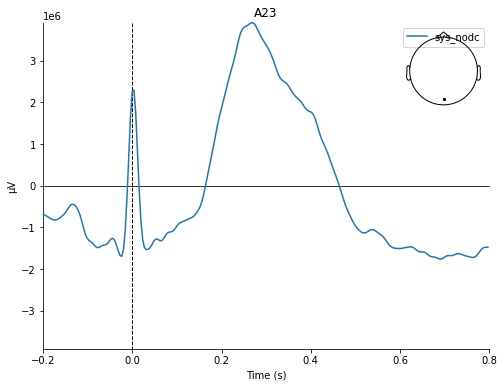

combining channels using "mean"


C:\Users\Vivi\AppData\Local\Temp\ipykernel_25996\2761565151.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  fig_fin=mne.viz.plot_compare_evokeds(sub_dict,ci=False, picks=['A23'],show_sensors=True,legend='upper right',truncate_yaxis=False,combine='mean')


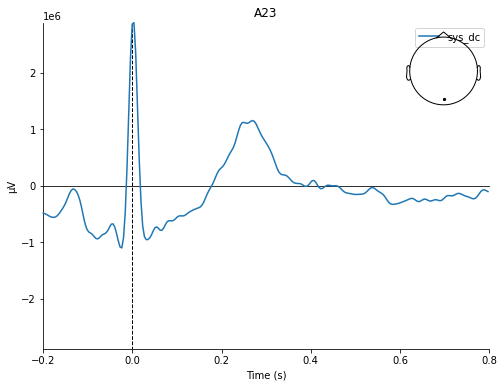

In [40]:
for cond,evo in evokeds.items():
    sub_dict={cond:evo}
    fig_fin=mne.viz.plot_compare_evokeds(sub_dict,ci=False, picks=['A23'],show_sensors=True,legend='upper right',truncate_yaxis=False,combine='mean')
    file_dir=f'ana/deconvolution/figures/waveforms_gavg_{modtype}_{erp_type}_{cond}_oz.svg'
    fig_fin[0].savefig(file_dir,format='svg')


In [61]:
file_dir=f'ana/deconvolution/figures/waveforms_gavg_{modtype}_{erp_type}_{cond}_dcnodc_oz.svg'
fig.savefig(file_dir,format='svg')

## Plot others

In [99]:

#define variables
modtype='modfit_card'
erp_type="hep"
cond='awareness_unaware_card_phase_sys'
dc_type="dc"

#load corresponding file


file_dir=f'ana/deconvolution/ep_betas/{modtype}/{dc_type}/gavg_{modtype}_{erp_type}_{cond}_{dc_type}.ep'
f = open(file_dir)

In [100]:
data_1=np.loadtxt(file_dir)
data.shape

(282, 128)

In [103]:

#define variables
#modtype='modfit_card'

dc_type="nodc"


#load corresponding file


file_dir=f'ana/deconvolution/ep_betas/{modtype}/{dc_type}/gavg_{modtype}_{erp_type}_{cond}_{dc_type}.ep'
f = open(file_dir)

In [104]:
data_2=np.loadtxt(file_dir)


In [105]:
def get_evo(data,tmin=-0.3):
    biosemi_montage = mne.channels.make_standard_montage('biosemi128')

    info = mne.create_info(ch_names=biosemi_montage.ch_names, sfreq=256.,
                           ch_types='eeg')
    evok=mne.EvokedArray(data,info,tmin=tmin)
    evok.set_montage(biosemi_montage)
    return evok

In [106]:
evo_1=get_evo(data_1.T).crop(-0.2,None)
evo_2=get_evo(data_2.T).crop(-0.2,None)

In [107]:
regions=dict(dc_post=['A5','A14','A16','A18','A23'],dc_front=['C32','D4'],nodc=['B12','B14','B23','B24'] )

regions=dict(nodc_post=['A13','A14','A16','A15','A23'],dc_front=['C32','D4'],nodc=['B12','B14','B23','B24'] )

if phy_sig=='rsp_phase':
    colors=[['olivedrab','darkgreen'],['tab:pink','purple']]
elif phy_sig=='cardiac_phase':
    colors=[['c','b'],['tab:orange','r']]
else:
    colors=['k','grey']

In [110]:


evokeds=dict(nodc=evo_1,dc=evo_2)

fig,axs=plt.subplots(1,3,figsize=(10,5))
n=0
for regio, picked in regions.items():
    print(picked)

    fig_fin=mne.viz.plot_compare_evokeds(evokeds,ci=False, picks=picked,show_sensors=True,legend='upper right',truncate_yaxis=False,axes=axs[n],combine='mean',vlines=[0,0.49,0.52],ylim=dict(eeg=[-1.5*1e6,1.5*1e6]))
    n+=1


['A5', 'A14', 'A16', 'A18', 'A23']
combining channels using "mean"
combining channels using "mean"
['C32', 'D4']
combining channels using "mean"
combining channels using "mean"
['B12', 'B14', 'B23', 'B24']
combining channels using "mean"
combining channels using "mean"


In [109]:
file_dir=f'ana/deconvolution/figures/waveforms_gavg_{modtype}_{erp_type}_{cond}_nodcdc.svg'
fig.savefig(file_dir,format='svg')

# Load erps and export to ep to then perform BF on R

In [33]:
awa='unaware'
if awa=='aware':
    cond="RRCA"
elif awa=='unaware':
    cond="RRCU"
else:
    print('error in awa cond')


filepath='ana/MNE/evo_list/maskOFF/correct/cfa/hep/norm/'
filename=f"maskOFF_correct_cfa_hep_norm_{cond}_list-ave.fif"
fp=filepath+filename
evo=mne.read_evokeds(fp)

Reading ana/MNE/evo_list/maskOFF/correct/cfa/hep/norm/maskOFF_correct_cfa_hep_norm_RRCU_list-ave.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.13 × hep/normal/correct/unaware/R/exh/RRCU + 0.12 × hep/normal/correct/unaware/R/inh/RRCU + 0.46 × hep/normal/correct/unaware/R2/exh/RRCU + 0.30 × hep/normal/correct/unaware/R2/inh/RRCU
 G_n= g01)
        0 CTF compensation matrices available
        nave = 298 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.18 × hep/normal/correct/unaware/R/exh/RRCU + 0.11 × hep/normal/correct/unaware/R/inh/RRCU + 0.45 × hep/normal/correct/unaware/R2/exh/RRCU + 0.25 × hep/normal/correct/unaware/R2/inh/RRCU

In [34]:
for ev in evo:
    g_num=ev.comment[-3:]
    ev.crop(None,0.8)
    data=ev.data.T
    filepath='ana/deconvolution/ep_betas/rawerps/nodc/'
    filename=f'{g_num}_{awa}_hep_rawerps_nodc.ep'
    fp=filepath+filename
    np.savetxt(fp,data)


In [15]:

ev.comment[-3:]

'g01'

# Test ERPs R1 vs R2


In [250]:
cond1='R'
cond2='R2'
filepath='ana/MNE/evo_list/maskOFF/correct/cfa/hep/norm/'
filename_1=f"maskOFF_correct_cfa_hep_norm_{cond1}_list-ave.fif"
fp_1=filepath+filename_1
evo_1=mne.read_evokeds(fp_1)
filename_2=f"maskOFF_correct_cfa_hep_norm_{cond2}_list-ave.fif"
fp_2=filepath+filename_2
evo_2=mne.read_evokeds(fp_2)

Reading ana/MNE/evo_list/maskOFF/correct/cfa/hep/norm/maskOFF_correct_cfa_hep_norm_R_list-ave.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.31 × hep/normal/correct/aware/R/exh/RRCA + 0.19 × hep/normal/correct/aware/R/inh/RRCA + 0.26 × hep/normal/correct/unaware/R/exh/RRCU + 0.24 × hep/normal/correct/unaware/R/inh/RRCU
 G_n= g01)
        0 CTF compensation matrices available
        nave = 147 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.36 × hep/normal/correct/aware/R/exh/RRCA + 0.31 × hep/normal/correct/aware/R/inh/RRCA + 0.21 × hep/normal/correct/unaware/R/exh/RRCU + 0.13 × hep/normal/correct/unaware/R/inh/RRCU
 G_n= g03)
   

In [136]:
s_hp.tTest_ana([evo_1,evo_2],crop_value=(-0.2,0.8),p_val=.005)

C:\Users\Vivi\Documents\GitHub\unfold_proj\stats\stats_helper.py:134: RuntimeWarning: tmin is not in Evoked time interval. tmin is set to evoked.tmin (-0.199219 sec)
  data_crop = evoked[0].copy().crop(crop_value[0], crop_value[1])
C:\Users\Vivi\Documents\GitHub\unfold_proj\stats\stats_helper.py:151: RuntimeWarning: tmin is not in Evoked time interval. tmin is set to evoked.tmin (-0.199219 sec)
  X[idx, :, :] = ev.copy().crop(crop_value[0], crop_value[1]).data
C:\Users\Vivi\Documents\GitHub\unfold_proj\stats\stats_helper.py:151: RuntimeWarning: tmin is not in Evoked time interval. tmin is set to evoked.tmin (-0.199219 sec)
  X[idx, :, :] = ev.copy().crop(crop_value[0], crop_value[1]).data
C:\Users\Vivi\Documents\GitHub\unfold_proj\stats\stats_helper.py:151: RuntimeWarning: tmin is not in Evoked time interval. tmin is set to evoked.tmin (-0.199219 sec)
  X[idx, :, :] = ev.copy().crop(crop_value[0], crop_value[1]).data
C:\Users\Vivi\Documents\GitHub\unfold_proj\stats\stats_helper.py:151:

(30, 128, 257)
(30, 128, 257)
-0.2


(array([[ 0.38364904,  0.13064933, -0.13025776, ...,  4.68183834,
          4.56078523,  4.53161644],
        [-0.96970458, -1.26204709, -1.55719402, ...,  6.7411199 ,
          6.56867121,  6.38699104],
        [-2.41905023, -2.62215091, -2.84065058, ...,  7.16505974,
          6.9884192 ,  6.85274007],
        ...,
        [-2.02571562, -2.17316039, -2.07879787, ...,  1.19254948,
          1.53183285,  1.85181908],
        [-0.76686227, -0.82565364, -0.724548  , ..., -1.01394771,
         -0.76216541, -0.41024876],
        [-0.5046647 , -0.40400419, -0.12667367, ..., -2.5585053 ,
         -2.24770685, -2.03072342]]),
 array([[7.04036946e-01, 8.96954818e-01, 8.97261850e-01, ...,
         6.13746020e-05, 8.58252735e-05, 9.30373004e-05],
        [3.40212435e-01, 2.16987846e-01, 1.30271753e-01, ...,
         2.13294570e-07, 3.39012885e-07, 5.54081094e-07],
        [2.20635038e-02, 1.37763397e-02, 8.15033823e-03, ...,
         6.91903443e-08, 1.10339093e-07, 1.58280983e-07],
        ...,


In [263]:
evokeds=dict(R=evo_1)
picked=('A23')
fig_fin=mne.viz.plot_compare_evokeds(evokeds,ci=False, picks=picked,show_sensors=True,legend='upper right',truncate_yaxis=False,combine='mean')


combining channels using "mean"


C:\Users\Vivi\AppData\Local\Temp\ipykernel_4024\3109885288.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  fig_fin=mne.viz.plot_compare_evokeds(evokeds,ci=False, picks=picked,show_sensors=True,legend='upper right',truncate_yaxis=False,combine='mean')


In [265]:
modtype='rawerps'
erp_type='hep'
cond='R'
file_dir=f'ana/deconvolution/figures/waveforms_gavg_{modtype}_{erp_type}_{cond}_nodc.svg'
fig_fin[0].savefig(file_dir,format='svg')

In [266]:
evokeds=dict(R2=evo_2)
fig_fin=mne.viz.plot_compare_evokeds(evokeds,ci=False, picks=picked,show_sensors=True,legend='upper right',truncate_yaxis=False,combine='mean')

combining channels using "mean"


C:\Users\Vivi\AppData\Local\Temp\ipykernel_4024\548891214.py:2: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  fig_fin=mne.viz.plot_compare_evokeds(evokeds,ci=False, picks=picked,show_sensors=True,legend='upper right',truncate_yaxis=False,combine='mean')


In [267]:
cond='R2'
file_dir=f'ana/deconvolution/figures/waveforms_gavg_{modtype}_{erp_type}_{cond}_nodc.svg'
fig_fin[0].savefig(file_dir,format='svg')